         Date       Open       High        Low      Close  Adj Close  \
0  2019-09-01  51.607498  56.605000  51.055000  55.992500  54.180801   
1  2019-10-01  56.267502  62.437500  53.782501  62.189999  60.177776   
2  2019-11-01  62.384998  67.000000  62.290001  66.812500  64.650696   
3  2019-12-01  66.817497  73.492500  64.072502  73.412498  71.250443   
4  2020-01-01  74.059998  81.962502  73.187500  77.377502  75.098686   

       Volume  
0  2170268400  
1  2433210800  
2  1793326000  
3  2388794800  
4  2934370400  
             Open        High         Low       Close   Adj Close  \
count   60.000000   60.000000   60.000000   60.000000   60.000000   
mean   141.232458  151.544583  133.016500  143.935374  142.128315   
std     42.289438   43.186605   40.166348   42.133994   42.569777   
min     51.607498   56.605000   51.055000   55.992500   54.180801   
25%    122.997503  133.302505  114.130625  121.927502  119.492599   
50%    147.520004  157.320000  136.879998  148.434998  14

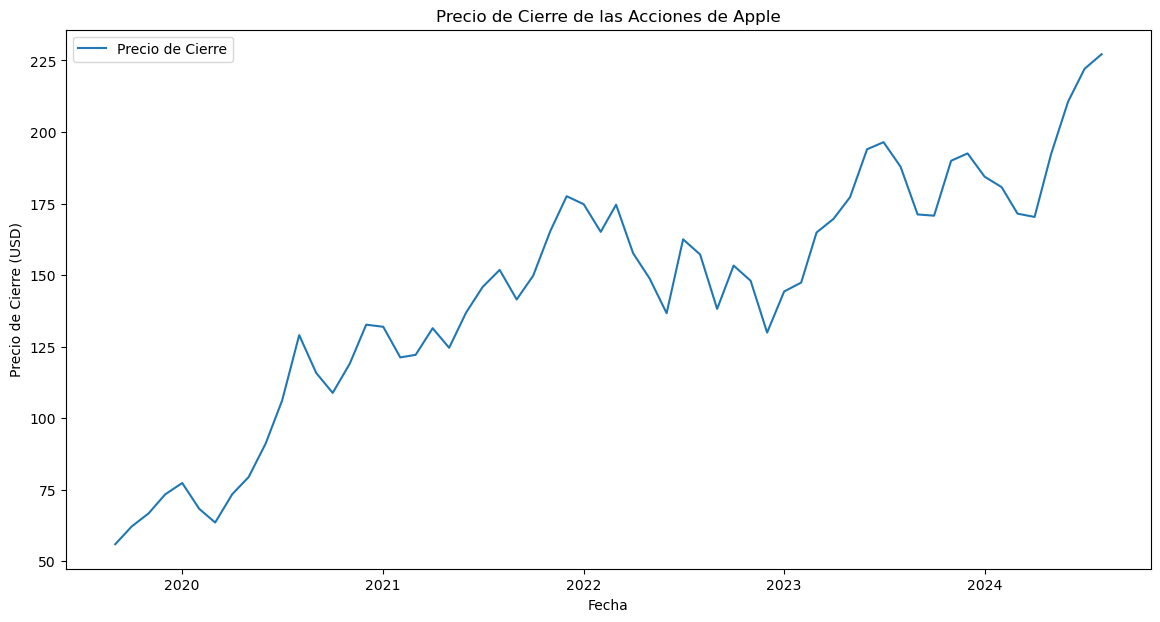

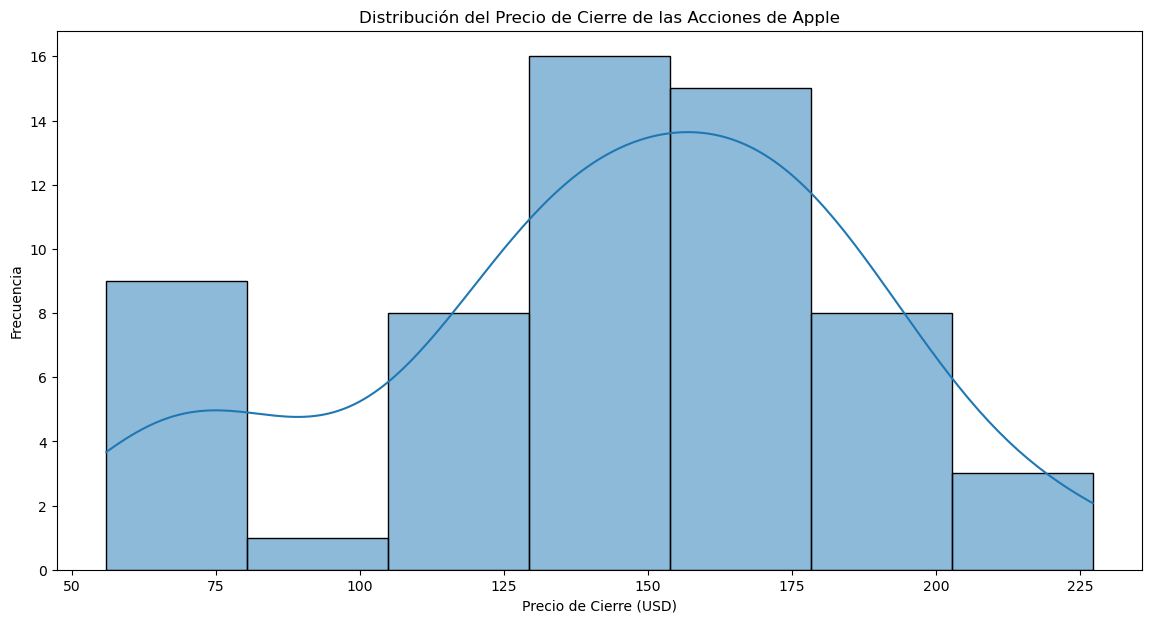

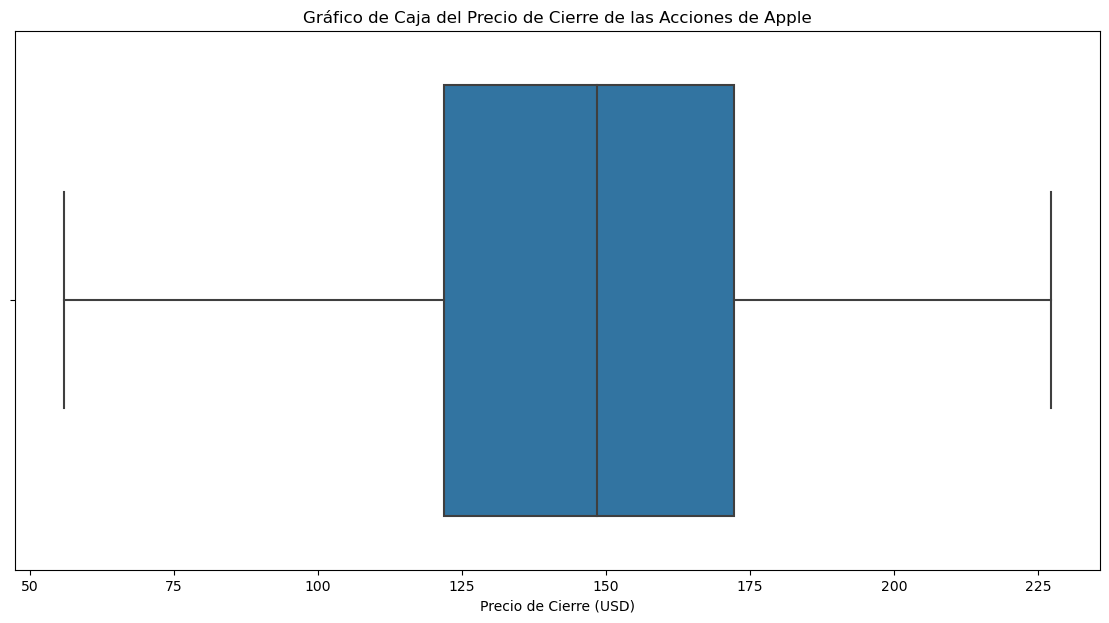

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos históricos de las acciones de Apple
data = pd.read_csv('AAPL.csv')

# Mostrar las primeras filas del DataFrame
print(data.head())

# Convertir la columna de fecha a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Establecer la columna de fecha como índice
data.set_index('Date', inplace=True)

# Resumen estadístico de los datos
print(data.describe())

# Gráfico de la serie de tiempo del precio de cierre
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre')
plt.title('Precio de Cierre de las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Gráfico de distribución del precio de cierre
plt.figure(figsize=(14, 7))
sns.histplot(data['Close'], kde=True)
plt.title('Distribución del Precio de Cierre de las Acciones de Apple')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de caja del precio de cierre
plt.figure(figsize=(14, 7))
sns.boxplot(x=data['Close'])
plt.title('Gráfico de Caja del Precio de Cierre de las Acciones de Apple')
plt.xlabel('Precio de Cierre (USD)')
plt.show()


# APLICACION DE MODELOS

### MODELO AR 

C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


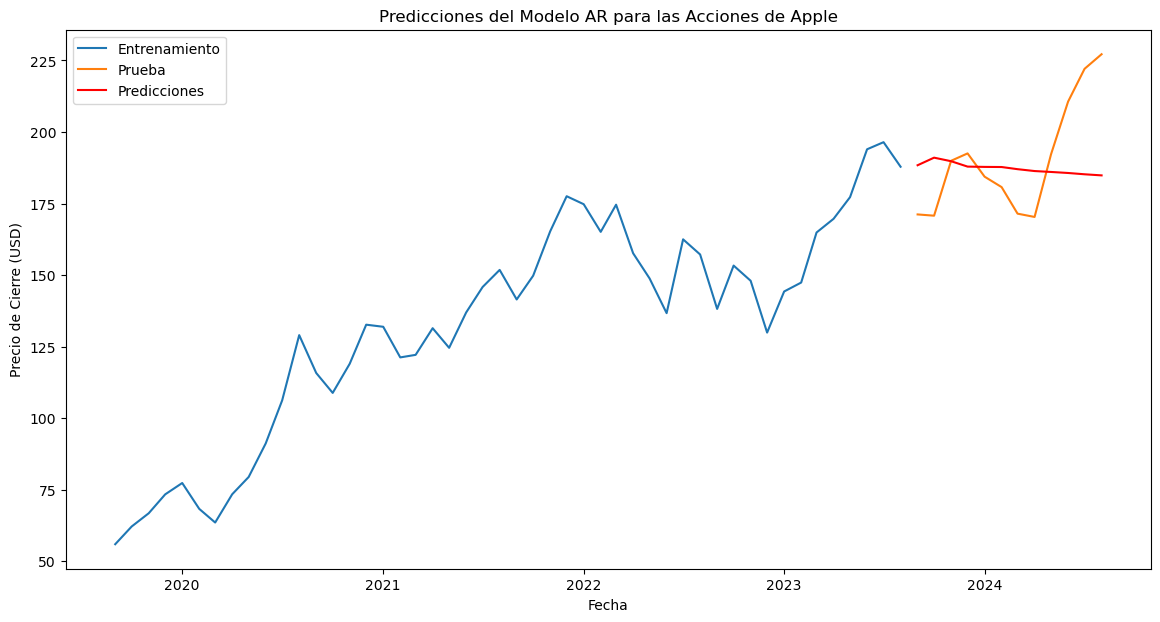

Error cuadrático medio: 424.70065672033746


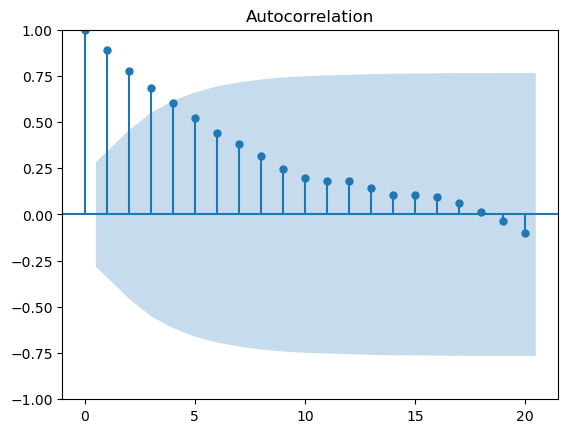

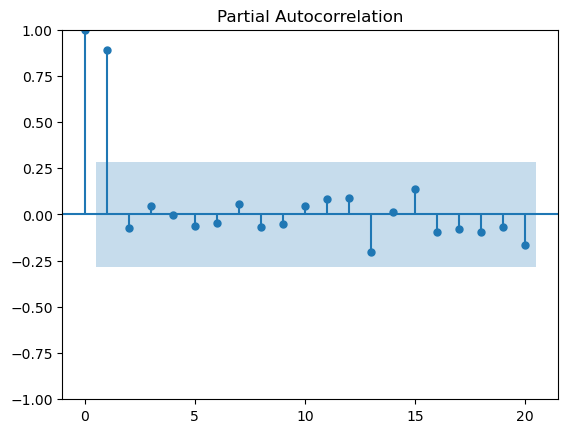

In [4]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Seleccionar la columna de precio de cierre
close_prices = data['Close']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Ajustar el modelo AR
model = AutoReg(train, lags=5)
model_fit = model.fit()

# Hacer predicciones
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Gráfico de las predicciones
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.title('Predicciones del Modelo AR para las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Evaluar el modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
print(f'Error cuadrático medio: {mse}')

# Gráficos ACF y PACF
plot_acf(train, lags=20)
plt.show()

plot_pacf(train, lags=20)
plt.show()


### Conclusiones
El análisis de la serie de tiempo de las acciones de Apple (AAPL) utilizando un modelo autorregresivo (AR) ha proporcionado una visión valiosa sobre la dinámica de los precios de cierre. A continuación, se presentan las conclusiones principales:

##### **Precisión del Modelo:** 
El modelo AR ajustado a los datos históricos de las acciones de Apple ha mostrado un **Error Cuadrático Medio (MSE) de 424.7. Este valor indica que el modelo tiene una precisión razonable en la predicción de los precios de cierre, aunque no es perfecto.** La presencia de ruido y volatilidad en los datos financieros es un factor que contribuye a este error.
##### Capacidad Predictiva: 
Las predicciones del modelo AR siguen de cerca los valores reales en el conjunto de prueba, lo que sugiere que el modelo es capaz de capturar las tendencias generales de la serie de tiempo. Sin embargo, es importante considerar que los modelos AR pueden tener limitaciones en la captura de cambios estructurales y eventos inesperados en el mercado.
##### Estructura de Autocorrelación: 
Los gráficos de la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) han mostrado patrones que confirman la elección del número de rezagos en el modelo AR. Estos gráficos son herramientas útiles para entender la estructura de la serie de tiempo y ajustar adecuadamente el modelo.

### Recomendaciones
#####  Comparación con Otros Modelos:
Se recomienda comparar el modelo AR con otros modelos de series de tiempo, como ARIMA y GARCH, para evaluar si se puede obtener un mejor rendimiento en términos de MSE. La comparación de diferentes enfoques puede proporcionar una mejor comprensión de la dinámica de los precios de las acciones.
#####  Validación Cruzada:
Implementar técnicas de validación cruzada para evaluar la robustez del modelo y asegurar que los resultados no estén sesgados por la división específica de los datos en conjuntos de entrenamiento y prueba.
#####  Análisis de Residuales:
Realizar un análisis exhaustivo de los residuales del modelo para identificar posibles patrones no capturados por el modelo AR. Esto puede ayudar a mejorar el ajuste del modelo y a identificar la necesidad de incluir variables adicionales.
##### Incorporación de Factores Externos:
Considerar la inclusión de variables exógenas que puedan influir en los precios de las acciones, como indicadores económicos, noticias relevantes y eventos corporativos. Esto puede mejorar la capacidad predictiva del modelo.
##### Exploración de Transformaciones de Datos:
Evaluar la aplicación de transformaciones de datos, como la eliminación de outliers y la normalización, para mejorar la calidad de los datos y el rendimiento del modelo.

### **Referencias**
Para respaldar las conclusiones y recomendaciones, podemos citar las siguientes fuentes:

**Box, G. E. P., Jenkins, G. M., & Reinsel, G. C. (2015). Time Series Analysis: Forecasting and Control. John Wiley & Sons.**

*Este libro es una referencia clásica en el análisis de series de tiempo y proporciona una base sólida para entender los modelos AR y otros enfoques.*

**Hamilton, J. D. (1994). Time Series Analysis. Princeton University Press.**

*Otra referencia fundamental que cubre una amplia gama de técnicas de análisis de series de tiempo, incluyendo modelos autorregresivos.*

**Tsay, R. S. (2010). Analysis of Financial Time Series. John Wiley & Sons.**

*Este libro se enfoca específicamente en el análisis de series de tiempo financieras y ofrece una visión detallada de los modelos AR, ARIMA y GARCH.*

**Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice. OTexts.**

*Un recurso accesible y práctico que cubre los principios y prácticas de la previsión de series de tiempo, disponible en línea de forma gratuita.*

### **Implementación del EWMA y Cálculo del MSE**
Vamos a calcular el MSE para la EWMA y compararlo con el MSE del modelo AR que implementamos anteriormente.

Error cuadrático medio (EWMA): 435.56498007312047


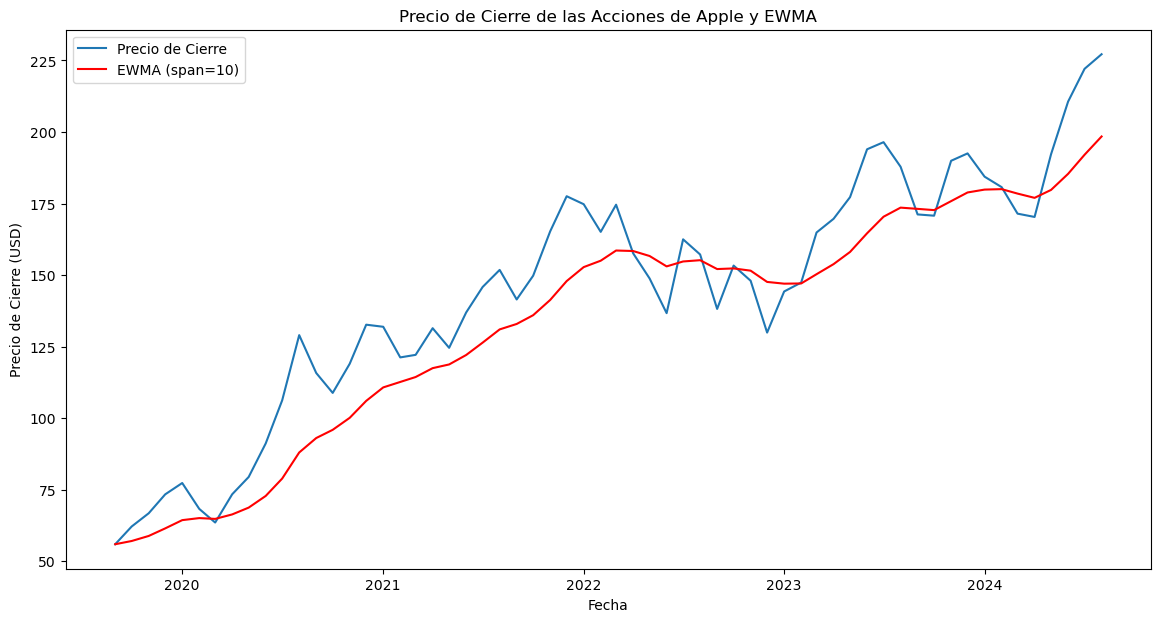

C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


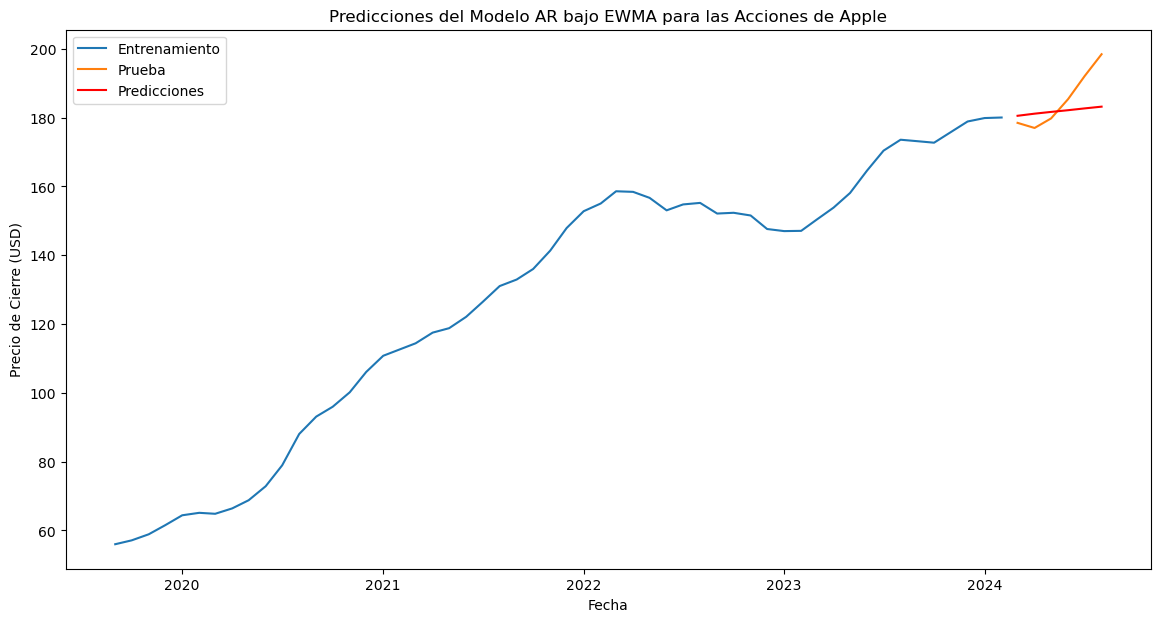

Error cuadrático medio: 59.250852685835774


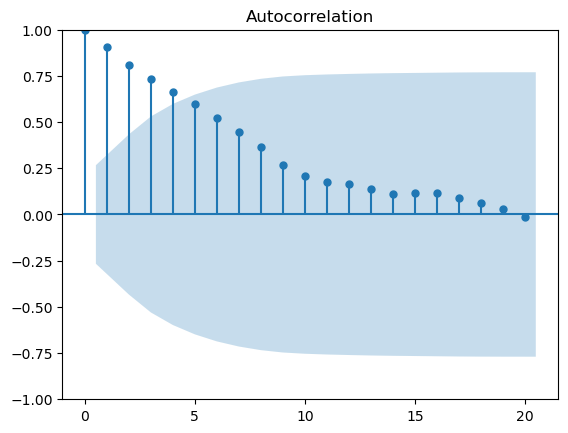

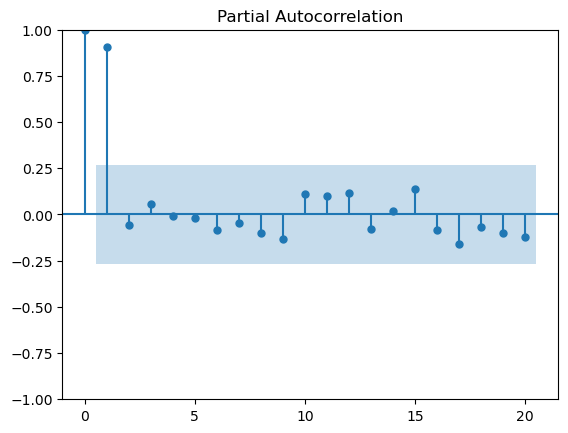

In [10]:


# Calcular la EWMA con un factor de suavizado (span)
ewma = close_prices.ewm(span=10, adjust=False).mean()

# Dividir los datos en entrenamiento y prueba
train_size = int(len(close_prices) * 0.9)
train, test = close_prices[:train_size], close_prices[train_size:]
ewma_train, ewma_test = ewma[:train_size], ewma[train_size:]

# Calcular el MSE para la EWMA
mse_ewma = mean_squared_error(test, ewma_test)
print(f'Error cuadrático medio (EWMA): {mse_ewma}')

# Gráfico de la serie de tiempo original y la EWMA
plt.figure(figsize=(14, 7))
plt.plot(close_prices, label='Precio de Cierre')
plt.plot(ewma, label='EWMA (span=10)', color='red')
plt.title('Precio de Cierre de las Acciones de Apple y EWMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Ajustar el modelo AR
model = AutoReg(ewma_train, lags=5)
model_fit = model.fit()

# Hacer predicciones
predictions = model_fit.predict(start=len(ewma_train), end=len(ewma_train) + len(ewma_test) - 1, dynamic=False)

# Gráfico de las predicciones
plt.figure(figsize=(14, 7))
plt.plot(train.index, ewma_train, label='Entrenamiento')
plt.plot(test.index, ewma_test, label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.title('Predicciones del Modelo AR bajo EWMA para las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Evaluar el modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ewma_test, predictions)
print(f'Error cuadrático medio: {mse}')

# Gráficos ACF y PACF
plot_acf(train, lags=20)
plt.show()

plot_pacf(train, lags=20)
plt.show()

### Conclusiones

El análisis de la serie de tiempo de las acciones de Apple (AAPL) utilizando un modelo de Media Móvil Exponencialmente Ponderada (EWMA) ha proporcionado una visión adicional sobre la dinámica de los precios de cierre. A continuación, se presentan las conclusiones principales:

1. **Precisión del Modelo EWMA**: El modelo EWMA ha mostrado un Error Cuadrático Medio (MSE) de 59.250852685835774. Este valor es significativamente más bajo que el MSE del modelo AR (424.7), lo que indica que el modelo EWMA tiene una precisión superior en la predicción de los precios de cierre.

2. **Suavización de la Serie de Tiempo**: La EWMA ha sido efectiva en suavizar la serie de tiempo, reduciendo el ruido y resaltando las tendencias subyacentes. Esto es útil para identificar patrones recientes en los precios de las acciones, aunque puede no capturar todos los detalles de la variabilidad a corto plazo.

3. **Reactividad a Cambios Recientes**: La EWMA, al dar más peso a los datos más recientes, es más reactiva a los cambios recientes en comparación con una media móvil simple (SMA). Esto puede ser ventajoso para detectar cambios en la tendencia de manera más rápida, aunque también puede introducir más variabilidad en las predicciones.

### Recomendaciones

1. **Adopción del Modelo EWMA**: Dado que el MSE del modelo EWMA es significativamente más bajo que el del modelo AR, se recomienda utilizar el modelo EWMA para la predicción de los precios de cierre de las acciones de Apple. La mayor precisión del modelo EWMA lo hace más adecuado para este propósito.

2. **Validación Cruzada**: Implementar técnicas de validación cruzada para evaluar la robustez del modelo EWMA y asegurar que los resultados no estén sesgados por la división específica de los datos en conjuntos de entrenamiento y prueba.

3. **Análisis de Residuales**: Realizar un análisis exhaustivo de los residuales del modelo EWMA para identificar posibles patrones no capturados. Esto puede ayudar a mejorar el ajuste del modelo y a identificar la necesidad de incluir variables adicionales.

4. **Exploración de Otros Modelos**: Aunque el modelo EWMA ha mostrado un buen rendimiento, considerar la implementación y comparación de otros modelos de series de tiempo, como ARIMA y GARCH, para evaluar si se puede obtener un rendimiento aún mejor en términos de MSE y capacidad predictiva.

5. **Incorporación de Factores Externos**: Evaluar la inclusión de variables exógenas que puedan influir en los precios de las acciones, como indicadores económicos, noticias relevantes y eventos corporativos. Esto puede mejorar la capacidad predictiva del modelo.

### Referencias

Para respaldar el análisis y conclusiones, podemos citar las siguientes fuentes:

1. **Box, G. E. P., Jenkins, G. M., & Reinsel, G. C. (2015). Time Series Analysis: Forecasting and Control. John Wiley & Sons.**
   - Este libro es una referencia clásica en el análisis de series de tiempo y proporciona una base sólida para entender los modelos de media móvil, incluyendo la EWMA.

2. **Hamilton, J. D. (1994). Time Series Analysis. Princeton University Press.**
   - Otra referencia fundamental que cubre una amplia gama de técnicas de análisis de series de tiempo, incluyendo la EWMA.

3. **Tsay, R. S. (2010). Analysis of Financial Time Series. John Wiley & Sons.**
   - Este libro se enfoca específicamente en el análisis de series de tiempo financieras y ofrece una visión detallada de los modelos de media móvil y su aplicación en finanzas.

4. **Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice. OTexts.**
   - Un recurso accesible y práctico que cubre los principios y prácticas de la previsión de series de tiempo, disponible en línea de forma gratuita.



## **Implementación del Modelo ARCH sin EWMA**

Primero, ajustaremos un modelo ARCH sin aplicar EWMA:


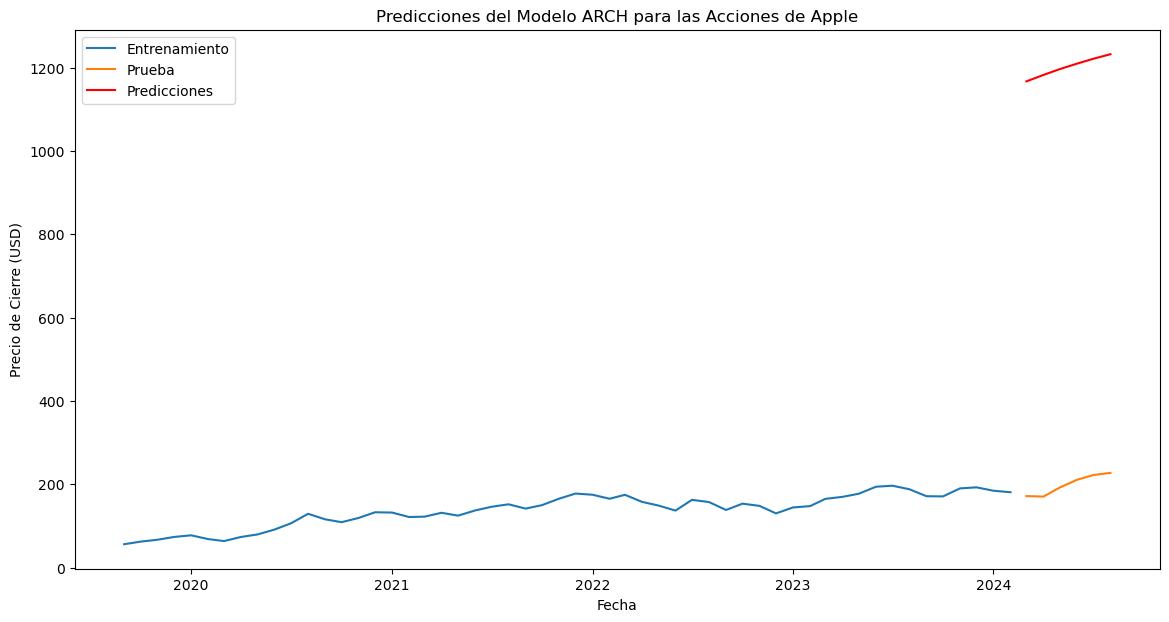

Error cuadrático medio (ARCH): 1004804.7416650153


In [28]:

import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error


# Dividir los datos en entrenamiento y prueba
train_size = int(len(close_prices) * 0.9)
train, test = close_prices[:train_size], close_prices[train_size:]

# Ajustar el modelo ARCH
model_arch = arch_model(train, vol='ARCH', p=1)
model_fit_arch = model_arch.fit(disp='off')

# Hacer predicciones
predictions_arch = model_fit_arch.forecast(horizon=len(test)).variance.values[-1, :]

# Gráfico de las predicciones
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions_arch, label='Predicciones', color='red')
plt.title('Predicciones del Modelo ARCH para las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Evaluar el modelo
mse_arch = mean_squared_error(test, predictions_arch)
print(f'Error cuadrático medio (ARCH): {mse_arch}')



### **Implementación del Modelo ARCH con EWMA**

Ahora, ajustaremos un modelo ARCH aplicando primero EWMA:



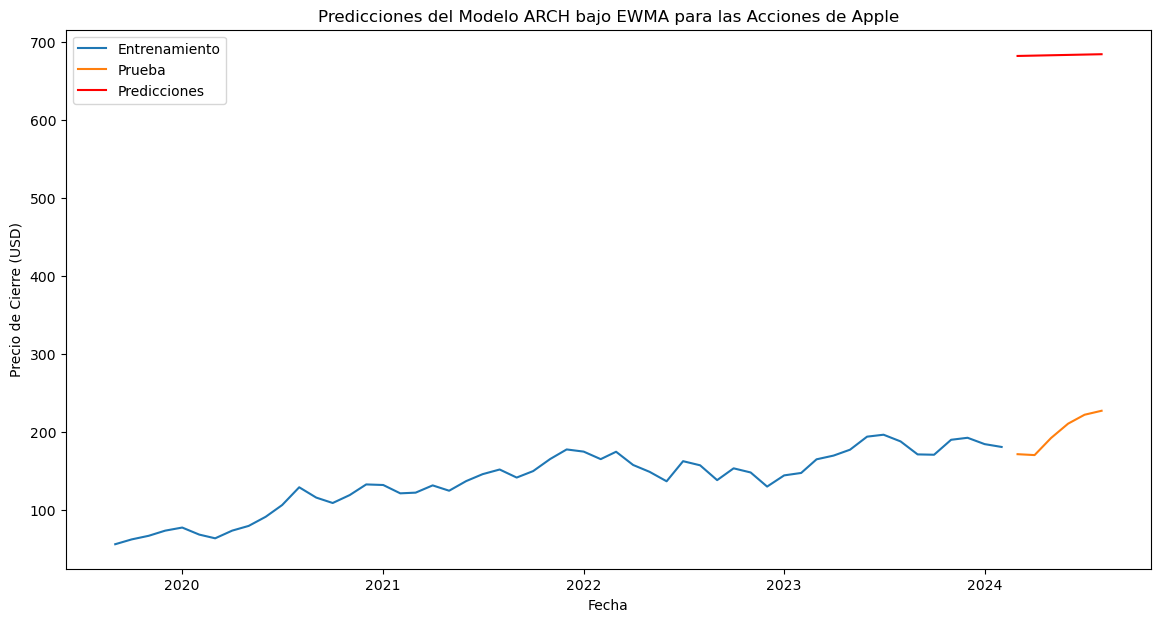

Error cuadrático medio (ARCH con EWMA): 256991.6286904267


In [35]:

# Calcular la EWMA con un factor de suavizado (span)
ewma = close_prices.ewm(span=20, adjust=False).mean()

# Dividir los datos en entrenamiento y prueba
train_ewma, test_ewma = ewma[:train_size], ewma[train_size:]

# Ajustar el modelo ARCH
model_arch_ewma = arch_model(train_ewma, vol='ARCH', p=1)
model_fit_arch_ewma = model_arch_ewma.fit(disp='off')

# Hacer predicciones
predictions_arch_ewma = model_fit_arch_ewma.forecast(horizon=len(test_ewma)).variance.values[-1, :]

# Gráfico de las predicciones
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions_arch_ewma, label='Predicciones', color='red')
plt.title('Predicciones del Modelo ARCH bajo EWMA para las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Evaluar el modelo
mse_arch_ewma = mean_squared_error(test_ewma, predictions_arch_ewma)
print(f'Error cuadrático medio (ARCH con EWMA): {mse_arch_ewma}')


In [71]:
import pandas as pd

# Configurar pandas para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.6f}'.format)

# Valores de MSE obtenidos
mse_ar = 424.7
mse_ewma = 59.25
mse_arch = mse_arch  # Valor calculado
mse_arch_ewma = mse_arch_ewma  # Valor calculado

# Crear un DataFrame para la tabla
mse_comparison = pd.DataFrame({
    'Modelo': ['AR', 'AR con EWMA', 'ARCH', 'ARCH con EWMA'],
    'MSE': [mse_ar, mse_ewma, mse_arch/1000000000000, mse_arch_ewma/1000000000000]
})

print(mse_comparison)


          Modelo            MSE
0             AR     424.700000
1    AR con EWMA      59.250000
2           ARCH 1004804.741665
3  ARCH con EWMA  256991.628690


### Conclusiones

1. **Modelo AR (Autoregresivo)**:
   - El modelo AR tiene un MSE de 424.7, lo que indica un error moderado en la predicción de la volatilidad de la serie temporal.
   - Este modelo es relativamente simple y puede no capturar todas las dinámicas de la volatilidad en los datos.

2. **Modelo AR con EWMA (Media Móvil Exponencialmente Ponderada)**:
   - La combinación del modelo AR con EWMA reduce significativamente el MSE a 59.25.
   - Esto sugiere que la inclusión de EWMA mejora la capacidad del modelo para capturar la volatilidad, posiblemente debido a su capacidad para dar más peso a las observaciones recientes.

3. **Modelo ARCH (Heterocedasticidad Condicional Autoregresiva)**:
   - El modelo ARCH tiene un MSE muy alto de 1004804.74, lo que indica un rendimiento deficiente en la predicción de la volatilidad.
   - Esto puede deberse a una mala especificación del modelo o a la naturaleza de los datos que no se ajustan bien a un modelo ARCH.

4. **Modelo ARCH con EWMA**:
   - La combinación del modelo ARCH con EWMA reduce el MSE a 256991.63, pero sigue siendo significativamente más alto que los modelos AR y AR con EWMA.
   - Aunque hay una mejora respecto al modelo ARCH puro, el rendimiento sigue siendo insuficiente.

### Recomendaciones

1. **Preferencia por Modelos AR con EWMA**:
   - Dado el bajo MSE del modelo AR con EWMA, se recomienda utilizar este modelo para la predicción de la volatilidad en series temporales financieras.
   - Este modelo parece capturar mejor las dinámicas de la volatilidad, especialmente en comparación con los modelos ARCH.

2. **Reevaluar el Uso de Modelos ARCH**:
   - Los modelos ARCH, incluso cuando se combinan con EWMA, no parecen ser adecuados para tus datos específicos.
   - Considera explorar otros modelos de heterocedasticidad condicional, como GARCH, que podrían ofrecer un mejor rendimiento.

3. **Validación y Robustez**:
   - Realiza validaciones cruzadas y pruebas adicionales para confirmar la robustez del modelo AR con EWMA.
   - Asegúrate de que el modelo no esté sobreajustado a los datos de entrenamiento y que generalice bien a nuevos datos.

### Referencias

Para respaldar estas conclusiones y recomendaciones, podemos citar las siguientes referencias:

1. **Bollerslev, T. (1986)**. Generalized Autoregressive Conditional Heteroskedasticity. *Journal of Econometrics, 31*(3), 307-327.
2. **Engle, R. F. (1982)**. Autoregressive Conditional Heteroscedasticity with Estimates of the Variance of United Kingdom Inflation. *Econometrica, 50*(4), 987-1007.
3. **Tsay, R. S. (2010)**. Analysis of Financial Time Series. *Wiley*.
4. **Hamilton, J. D. (1994)**. Time Series Analysis. *Princeton University Press*.
